# Minimum norm solutions

## A simple example

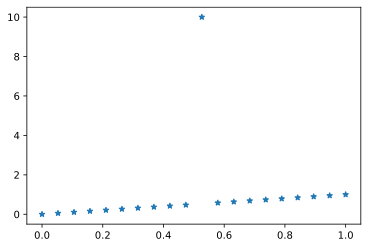

In [50]:
import cvxpy as cp
import numpy as np

# Generate data.
t = np.linspace(0,1,20)
b = t.copy()
b[10] = 10

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

plt.plot(t,b,'*')
plt.show()

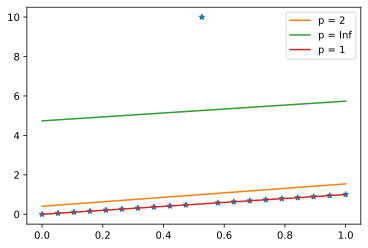

In [51]:
A = np.c_[np.ones(t.shape[0]),t]

plt.plot(t,b,'*')
plist = [2, 'Inf', 1]
for p in plist:
    x = cp.Variable(A.shape[1])
    obj = cp.norm(A*x - b,p)
    prob = cp.Problem(cp.Minimize(obj))
    prob.solve()
    intercept, slope = x.value[0], x.value[1]
    plt.plot(t,intercept+slope*t,label = 'p = {}'.format(p))

plt.legend()
plt.show()

## Decoding by linear programming (Candès and Tao, 2005)

We make $A$ and $x_0$ and set 

$$
b = Ax_0
$$

In [52]:
m, n = 500, 200
A = np.random.randn(m,n)
x0 = np.random.randn(n)
b = A@x0

We then take 20\% of the entries of $b$ and corrupt them in such a way that the corrupted values have nothing to do with reality!


In [55]:
bcorrupted = b.copy()
ncorrupted = 100
id_corrupted = np.random.choice(m,ncorrupted,replace=False)
bcorrupted[id_corrupted] = -40*b[id_corrupted]

The question is whether we can still recover $x_0$ upon seeing the corrupted values $b_{\text{corrupted}}$. Of course, we do not know which values have been corrupted. So we would like to find so that 

$$
Ax \approx b_{\text{corrupted}}
$$

How about we try this via least squares, i.e. minimize $\|Ax - b_{\text{corrupted}}\|_2$?

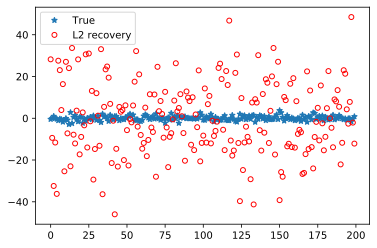

In [56]:
x = cp.Variable(n)
obj = cp.norm(A*x - bcorrupted,2)
prob = cp.Problem(cp.Minimize(obj))
prob.solve()
plt.plot(x0,'*',label='True')
plt.plot(x.value,'o', markersize=5, markeredgewidth=1,markeredgecolor='r',
         markerfacecolor='None',label ='L2 recovery')
plt.legend()
plt.show()

This is horrible!



How about we try this by minimizing the sum of the absolute values of the residuals, i.e. we minimize $\|Ax - b_{\text{corrupted}}\|_1$?


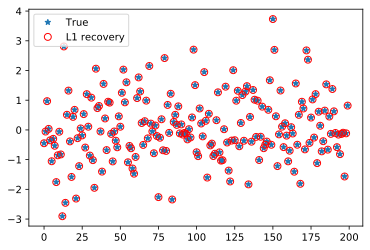

In [57]:
x = cp.Variable(n)
obj = cp.norm(A*x - bcorrupted,1)
prob = cp.Problem(cp.Minimize(obj))
prob.solve()
plt.plot(x0,'*',label='True')
plt.plot(x.value,'o', markersize=7, markeredgewidth=1,markeredgecolor='r',
         markerfacecolor='None',label ='L1 recovery')
plt.legend()
plt.show()

### This is an instance of $\ell_1$ magic!